In [88]:
import xarray as xr
import numpy  as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.style import use as usestyle
from matplotlib import colors
from matplotlib.colors import BoundaryNorm
import matplotlib as mpl
from time import perf_counter
import xesmf
import cartopy.crs as ccrs
from cartopy import feature as cfeature
# import metpy as mpy
from pandas import date_range
from glob import glob
from pandas import date_range
from datetime import datetime, timedelta
from matplotlib.lines import Line2D

In [113]:
# usestyle("paperplots.mplstyle")
from matplotlib import font_manager as fm
fontdir = "/home/ascheb/libfonts/*.ttf"
for fpath in glob(fontdir):
    print(fpath)
    fm.fontManager.addfont(fpath)

usestyle("paperplots.mplstyle")
from matplotlib import rcParams
rcParams["figure.titlesize"] = 10
rcParams["axes.titlesize"] = 8
rcParams["axes.labelsize"] = 8
rcParams["xtick.labelsize"] = 6.5
rcParams["ytick.labelsize"] = 6.5
rcParams["axes.linewidth"] = 0.2

/home/ascheb/libfonts/LiberationSans-Italic.ttf
/home/ascheb/libfonts/LiberationMono-Bold.ttf
/home/ascheb/libfonts/LiberationSerif-Bold.ttf
/home/ascheb/libfonts/LiberationSerif-Regular.ttf
/home/ascheb/libfonts/LiberationSans-Regular.ttf
/home/ascheb/libfonts/LiberationSans-BoldItalic.ttf
/home/ascheb/libfonts/LiberationMono-Regular.ttf
/home/ascheb/libfonts/LiberationSerif-Italic.ttf
/home/ascheb/libfonts/LiberationSerif-BoldItalic.ttf
/home/ascheb/libfonts/LiberationMono-BoldItalic.ttf
/home/ascheb/libfonts/LiberationSans-Bold.ttf
/home/ascheb/libfonts/LiberationMono-Italic.ttf


In [90]:
class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, vcenter=None, clip=False):
        self.vcenter = vcenter
        super().__init__(vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        # Note also that we must extrapolate beyond vmin/vmax
        x, y = [self.vmin, self.vcenter, self.vmax], [0, 0.5, 1.]
        return np.ma.masked_array(np.interp(value, x, y,
                                            left=-np.inf, right=np.inf))

    def inverse(self, value):
        y, x = [self.vmin, self.vcenter, self.vmax], [0, 0.5, 1]
        return np.interp(value, x, y, left=-np.inf, right=np.inf)

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

In [ ]:
control_initsnow = xr.open_dataset(f"/moonbow/ascheb/les/2010/hires_control/rams_output/a-A-2010-01-01-120000-g1.h5")["SFCWATER_MASS"]
nolake_initsnow = xr.open_dataset(f"/moonbow/ascheb/les/2010/hires_nolake/rams_output/a-A-2010-01-01-120000-g1.h5")["SFCWATER_MASS"]

In [ ]:
control_varsnow = xr.open_dataset(f"/moonbow/ascheb/les/2010/hires_control/varfiles/var-V-2010-01-02-220000-g1.h5")

In [ ]:
control_finalsnow = xr.open_dataset(f"/moonbow/ascheb/les/2010/hires_control/rams_output/a-A-2010-01-03-120000-g1.h5")["SFCWATER_MASS"]

In [ ]:
control_initsh = xr.open_dataset(f"/moonbow/ascheb/les/2010/hires_control/rams_output/a-A-2010-01-01-122000-g1.h5")["SFLUX_T"]*1000
control_finalsh = xr.open_dataset(f"/moonbow/ascheb/les/2010/hires_control/rams_output/a-A-2010-01-03-120000-g1.h5")["SFLUX_T"]*1000

In [ ]:
plt.figure()
plt.pcolormesh(control_varsnow["SNOWDEPTH"])

In [ ]:
print(control_initsnow)

In [ ]:
plt.pcolormesh(control_finalsnow[1,:,:,:].sum(dim = "phony_dim_4"), cmap = "Blues", vmin = 0, vmax = 100)

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (27, 10))
# ax1.contour(control_initsnow["Patch"][1,:,:], levels = [0.999], colors = "black", linewidths = 0.5)
ax1.pcolormesh(control_initsnow[1,:,:,:].sum(dim = "phony_dim_4"), cmap = "Blues", vmin = 0, vmax = 10)
# ax2.contour(control_initsnow["Patch"][1,:,:], levels = [0.999], colors = "black", linewidths = 0.5)
ax2.pcolormesh(control_finalsnow[1,:,:,:].sum(dim = "phony_dim_4"), cmap = "Blues", vmin = 0, vmax = 10)
ax3.pcolormesh(control_finalsnow[1,:,:,:].sum(dim = "phony_dim_4")-control_initsnow[1,:,:,:].sum(dim = "phony_dim_4"), cmap = "bwr_r", vmin = -10, vmax = 10)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (18, 10))
# ax1.contour(control_initsnow["Patch"][1,:,:], levels = [0.999], colors = "black", linewidths = 0.5)
ax1.pcolormesh(control_initsh[:,:], cmap = "bwr", vmin = -750, vmax = 750)
# ax2.contour(control_initsnow["Patch"][1,:,:], levels = [0.999], colors = "black", linewidths = 0.5)
ax2.pcolormesh(control_finalsh[:,:], cmap = "bwr", vmin = -750, vmax = 750)

In [4]:
ftime = "02-2300"
afile_nolake = xr.open_dataset(f"/moonbow/ascheb/les/2010/hires_nolake/processed_data/mergedvars_2010-01-{ftime}00.nc")
afile_control = xr.open_dataset(f"/moonbow/ascheb/les/2010/hires_control/processed_data/mergedvars_2010-01-{ftime}00.nc")
# afile_control = xr.open_dataset(f"/moonbow/ascheb/les/2010/hires_control/rams_output/a-A-2010-01-{ftime}00-g1.h5")
# afile_nolake = xr.open_dataset(f"/moonbow/ascheb/les/2010/hires_nolake/rams_output/a-A-2010-01-{ftime}00-g1.h5")

In [ ]:
print(afile_control)

## Make a figure of the simulation domains (terrain height and water body location)

In [ ]:
# terls = colors.LightSource(azdeg = 315, altdeg = 30)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 9), dpi = 300)
axlabs = ["(a)", "(b)"]
modtopocmap = truncate_colormap(mpl.colormaps.get_cmap("gist_earth"), minval = 0.5, maxval = 1, n = 128)
for i, ax in enumerate(fig.get_axes()):
    ax.annotate(axlabels[i], (0.04, 0.94), xycoords = "axes fraction", color = "black", fontsize = 30, horizontalalignment = "center", bbox = {"edgecolor": "black", "linewidth": 1, "facecolor": "white"}, zorder = 2)
# for ax in [ax1, ax2]:
#     tershade = terls.shade(afile_nolake["Topo"].values, dx = 1000, dy = 1000, vert_exag = 20, blend_mode = "soft", cmap = plt.get_cmap("gist_earth"), vmin = -20, vmax = 1000, norm = MidpointNormalize(vmin = -20, vmax = 1000, vcenter = 0))
#     ax.imshow(tershade, origin = "lower")
#     ax.set_xticks(np.arange(
termp = ax1.pcolormesh(afile_control["lon2d"], afile_nolake["lat2d"], afile_nolake["Topo"], cmap = modtopocmap, vmin = 0, vmax = 1000)
ax2.pcolormesh(afile_nolake["lon2d"], afile_nolake["lat2d"], afile_nolake["Topo"], cmap = modtopocmap, vmin = 0, vmax = 1000)
ax1.pcolormesh(afile_control["lon2d"], afile_control["lat2d"], afile_control["Patch"][0,:,:].where(afile_control["Patch"][0,:,:]>0.01), vmin = 0, vmax = 0.1, cmap = "coolwarm_r", shading = "nearest")
ax2.pcolormesh(afile_control["lon2d"], afile_control["lat2d"], afile_nolake["Patch"][0,:,:].where(afile_nolake["Patch"][0,:,:]>0.01), vmin = 0, vmax = 0.1, cmap = "coolwarm_r", shading = "nearest")
ax1.annotate("Lake Huron", [-82.8, 44.8], horizontalalignment = "center", verticalalignment = "center", fontfamily = "fantasy", fontweight = "demibold", fontsize = 18, rotation = 305, color = "white")
ax1.annotate("Lake Erie", [-81.2, 42.1], horizontalalignment = "center", verticalalignment = "center", fontfamily = "fantasy", fontweight = "demibold", fontsize = 18, rotation = 23, color = "white")
ax1.annotate("Lake Ont.", [-78, 43.6], horizontalalignment = "center", verticalalignment = "center", fontfamily = "fantasy", fontweight = "demibold", fontsize = 18, rotation = 0, color = "white")
ax1.set_title("CONTROL", fontfamily = "Liberation Serif")
ax2.set_title("NLH", fontfamily = "Liberation Serif")
ax1.set_ylabel("Latitude (Degrees N)", fontfamily = "Liberation Serif")
cbar = fig.colorbar(termp, ax = [ax1, ax2], orientation = "horizontal", ticks = [-20, 0, 200, 500, 1000], fraction = 0.05, extend = "max"); cbar.set_label("Terrain Height (m)", fontfamily = "Liberation Serif")

ax1.set_xlabel("Longitude (Degrees E)", fontsize = 20, fontfamily = "Liberation Serif")
ax2.set_xlabel("Longitude (Degrees E)", fontsize = 20, fontfamily = "Liberation Serif")
# fig.text(0.5, 0.18, "Longitude (Degrees E)", fontsize = 20, ha = "center", name = "Liberation Serif")
fig.suptitle("Simulation Domain", fontfamily = "Liberation Serif")
fig.savefig("PaperFigs/domain.png")
plt.close()
del fig; del ax1; del ax2

In [ ]:
# plt.pcolormesh(snowdiff_control, cmap = "twilight", vmin = 0, vmax = 30)
# plt.contour(afile_control["Patch"].isel(patch = 1), levels = [0.99], colors = "black")
# plt.scatter(400, 525, color = "red", s = 2)

## Calculating/Plotting Changes in Snowfall

In [92]:
nolake_snow_old = xr.open_dataset(f"/moonbow/ascheb/les/2010/hires_nolake/processed_data/mergedvars_2010-01-02-060000.nc")
control_snow_old = xr.open_dataset(f"/moonbow/ascheb/les/2010/hires_control/processed_data/mergedvars_2010-01-02-060000.nc")
nolake_snow_new = xr.open_dataset(f"/moonbow/ascheb/les/2010/hires_nolake/processed_data/mergedvars_2010-01-03-060000.nc")
control_snow_new = xr.open_dataset(f"/moonbow/ascheb/les/2010/hires_control/processed_data/mergedvars_2010-01-03-060000.nc")

snowdiff_control = control_snow_new["SnowPrecipTotal"]+control_snow_new["AggPrecipTotal"]-control_snow_old["SnowPrecipTotal"]-control_snow_old["AggPrecipTotal"]
snowdiff_nolake = nolake_snow_new["SnowPrecipTotal"]+nolake_snow_new["AggPrecipTotal"]-nolake_snow_old["SnowPrecipTotal"]-nolake_snow_old["AggPrecipTotal"]

In [93]:
ix0 = 400; iy0 = 525 #Northwest side of the "downwind of lake erie" box, at the center of the downwind shore
x0 = snowdiff_control["x"].isel(x = ix0); y0 = snowdiff_control["y"].isel(y = iy0); dxy = np.diff(snowdiff_control["x"])[0]
width = 400000; length = 305000 #m, dimensions of the box
tarray = np.arange(0, length+1, dxy); narray = np.arange(-width/2, width/2+1, dxy) #Coordinates of the box in tangent (long-axis) and normal (short-axis) directions. Normal is negative and positive (northeast and southwest), while tangent is only positive (to the right)
tmesh, nmesh = np.meshgrid(tarray, narray)
print(tmesh)
print(nmesh)
angle = np.pi/180*(-60) #Angle of the long axis of the box, with respect to the horizontal
xbox = x0.values+np.cos(angle)*tmesh-np.sin(angle)*nmesh
ybox = y0.values+np.sin(angle)*tmesh+np.cos(angle)*nmesh
snowbox = xr.DataArray(coords = {"y": (("normal", "tangent"), ybox), "x": (("normal", "tangent"), xbox), "normal": narray, "tangent": tarray}, dims = ["normal", "tangent"])

[[     0.   1000.   2000. ... 303000. 304000. 305000.]
 [     0.   1000.   2000. ... 303000. 304000. 305000.]
 [     0.   1000.   2000. ... 303000. 304000. 305000.]
 ...
 [     0.   1000.   2000. ... 303000. 304000. 305000.]
 [     0.   1000.   2000. ... 303000. 304000. 305000.]
 [     0.   1000.   2000. ... 303000. 304000. 305000.]]
[[-200000. -200000. -200000. ... -200000. -200000. -200000.]
 [-199000. -199000. -199000. ... -199000. -199000. -199000.]
 [-198000. -198000. -198000. ... -198000. -198000. -198000.]
 ...
 [ 198000.  198000.  198000. ...  198000.  198000.  198000.]
 [ 199000.  199000.  199000. ...  199000.  199000.  199000.]
 [ 200000.  200000.  200000. ...  200000.  200000.  200000.]]


In [103]:
downwindsnow_control = snowdiff_control.interp(x = snowbox["x"], y = snowbox["y"])
downwindsnow_nolake = snowdiff_nolake.interp(x = snowbox["x"], y = snowbox["y"])
downwindsnow_nohrsc = jan3snowregrid.interp(x = snowbox["x"], y = snowbox["y"])

In [112]:
print(np.count_nonzero(downwindsnow_control>1))
print(np.count_nonzero(downwindsnow_nohrsc["Snowfall"]>1))

55957
108415


In [110]:
print(downwindsnow_nohrsc["Snowfall"].mean())
print(downwindsnow_control.mean())

<xarray.DataArray 'Snowfall' ()>
array(18.9692548)
<xarray.DataArray ()>
array(1.87139324)


In [106]:
print(snowdiff_control.isel(y = slice(laurelindices[:,0].min(), laurelindices[:,0].max()), x = slice(laurelindices[:,1].min(), laurelindices[:,1].max())).mean())
print(1/10*jan3snowregrid["Snowfall"].isel(y = slice(laurelindices[:,0].min(), laurelindices[:,0].max()), x = slice(laurelindices[:,1].min(), laurelindices[:,1].max())).mean())

<xarray.DataArray ()>
array(4.09452, dtype=float32)
<xarray.DataArray 'Snowfall' ()>
array(2.37217178)


In [95]:
print(downwindsnow_control["lat1d"].shape)

(401, 306)


In [96]:
patchpoints = np.zeros((4, 2))
patchpoints[:,0] = [downwindsnow_control["lon1d"].values[0,0], downwindsnow_control["lon1d"].values[0, -1], downwindsnow_control["lon1d"].values[-1, -1], downwindsnow_control["lon1d"].values[-1, 0]]
patchpoints[:,1] = [downwindsnow_control["lat1d"].values[0,0], downwindsnow_control["lat1d"].values[0, -1], downwindsnow_control["lat1d"].values[-1, -1], downwindsnow_control["lat1d"].values[-1, 0]]
print(patchpoints)

[[-83.28823737  40.88867569]
 [-81.44339724  38.51277667]
 [-77.24977453  40.31159993]
 [-79.0953639   42.6884079 ]]


In [97]:
print(downwindsnow_control[210:250, 0:100].mean(), downwindsnow_nolake[210:250, 0:100].mean(), downwindsnow_control[210:250, 0:100].sum()/downwindsnow_nolake[210:250, 0:100].sum()) #Change in snowfall in main band
#Points 210:250, 0:100 form a rectangle roughly bounding the main snow band over Lake Erie in the CONTROL simulation
patchpointssub = np.zeros((4, 2)) #These are the points for box B in the figure below, outlining the main band
patchpointssub[:,0] = [downwindsnow_control["lon1d"].values[210,0], downwindsnow_control["lon1d"].values[210, 100], downwindsnow_control["lon1d"].values[250, 100], downwindsnow_control["lon1d"].values[250, 0]]
patchpointssub[:,1] = [downwindsnow_control["lat1d"].values[210,0], downwindsnow_control["lat1d"].values[210, 100], downwindsnow_control["lat1d"].values[250, 100], downwindsnow_control["lat1d"].values[250, 0]]
print(patchpointssub)
# print(downwindsnow_control[210:250, 0:100].mean(), downwindsnow_nolake[210:250, 0:100].mean(), downwindsnow_control[210:250, 0:100].sum()/downwindsnow_nolake[210:250, 0:100].sum())

<xarray.DataArray ()>
array(8.70520571) <xarray.DataArray ()>
array(2.38316553) <xarray.DataArray ()>
array(3.65279105)
[[-81.08788434  41.8335228 ]
 [-80.48245374  41.05422061]
 [-80.06295688  41.23418658]
 [-80.66844089  42.0134964 ]]


In [98]:
patchpointsne = np.zeros((4,2)) #Points bounding the band in northeast Lake Erie (box D)
patchpointsne[:,0] = [downwindsnow_control["lon1d"].values[350,0], downwindsnow_control["lon1d"].values[350, 100], downwindsnow_control["lon1d"].values[400, 100], downwindsnow_control["lon1d"].values[400, 0]]
patchpointsne[:,1] = [downwindsnow_control["lat1d"].values[350,0], downwindsnow_control["lat1d"].values[350, 100], downwindsnow_control["lat1d"].values[400, 100], downwindsnow_control["lat1d"].values[400, 0]]
print(patchpointsne)

[[-79.61969565  42.46344376]
 [-79.01425595  41.68411868]
 [-78.49002485  41.90909427]
 [-79.0953639   42.6884079 ]]


In [99]:
patchpoints_between = np.zeros((4, 2)) #Points bounding area downwind of Lake Erie between box B and box D (box C)
patchpoints_between[:,0] = [downwindsnow_control["lon1d"].values[250,0], downwindsnow_control["lon1d"].values[250, 100], downwindsnow_control["lon1d"].values[350, 100], downwindsnow_control["lon1d"].values[350, 0]]
patchpoints_between[:,1] = [downwindsnow_control["lat1d"].values[250,0], downwindsnow_control["lat1d"].values[250, 100], downwindsnow_control["lat1d"].values[350, 100], downwindsnow_control["lat1d"].values[350, 0]]
print(patchpoints_between)

[[-80.66844089  42.0134964 ]
 [-80.06295688  41.23418658]
 [-79.01425595  41.68411868]
 [-79.61969565  42.46344376]]


In [100]:
laurelindices = np.argwhere((control_snow_old["lat2d"].values>39.72)*(control_snow_old["lat2d"].values<40.4)*(control_snow_old["lon2d"].values>-79.8)*(control_snow_old["lon2d"].values<-78.65)) #Rectangle roughly covering the laurel highlands
laurelpatchpoints = np.zeros((4,2))
laurelpatchpoints[:,0] = [control_snow_old["lon1d"].values[laurelindices[:,1].min()], control_snow_old["lon1d"].values[laurelindices[:,1].max()], control_snow_old["lon1d"].values[laurelindices[:,1].max()], control_snow_old["lon1d"].values[laurelindices[:,1].min()]]
laurelpatchpoints[:,1] = [control_snow_old["lat1d"].values[laurelindices[:,0].min()], control_snow_old["lat1d"].values[laurelindices[:,0].min()], control_snow_old["lat1d"].values[laurelindices[:,0].max()], control_snow_old["lat1d"].values[laurelindices[:,0].max()]]
print(laurelpatchpoints) #Show this rectangle on the snowfall difference plot as box E
laurelpatchcenter = [np.mean(laurelpatchpoints[:,0]), np.mean(laurelpatchpoints[:,1])]
print(snowdiff_control.isel(y = slice(laurelindices[:,0].min(), laurelindices[:,0].max()), x = slice(laurelindices[:,1].min(), laurelindices[:,1].max())).mean()) #CONTROL simulation snowfall over the laurel highlands
print(snowdiff_nolake.isel(y = slice(laurelindices[:,0].min(), laurelindices[:,0].max()), x = slice(laurelindices[:,1].min(), laurelindices[:,1].max())).mean()) #NLH simulation snowfall over the laurel highlands

[[-79.78807068  39.72808456]
 [-78.61355591  39.72808456]
 [-78.61355591  40.40280914]
 [-79.78807068  40.40280914]]
<xarray.DataArray ()>
array(4.09452, dtype=float32)
<xarray.DataArray ()>
array(2.4225073, dtype=float32)


In [101]:
# control_gridconsts = afile_control[["Topo", "NDVI", "LeafArea", "VegHeight", "VegRoughness", "VegFraction", "VegAlbedo", "SurfaceRoughness", "Patch", "VegClass", "VegAlbedo", "Albedo"]]
# nolake_gridconsts = afile_nolake[["Topo", "NDVI", "LeafArea", "VegHeight", "VegRoughness", "VegFraction", "VegAlbedo", "SurfaceRoughness", "Patch", "VegClass", "VegAlbedo", "Albedo"]]

# control_gridconsts.to_netcdf("/moonbow/ascheb/les/2010/hires_control/gridconsts.nc")
# nolake_gridconsts.to_netcdf("/moonbow/ascheb/les/2010/hires_nolake/gridconsts.nc")

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (7.5, 3.5), dpi = 200, layout = "constrained")
startt = datetime(2010, 1, 2, 6, 0, 0); print(startt)
endt = datetime(2010, 1, 3, 6, 0, 0); print(endt)
axlabels = ["(a)", "(b)", "(c)"]
modtopocmap = truncate_colormap(mpl.colormaps.get_cmap("gist_earth"), minval = 0.5, maxval = 1, n = 128)
for i, ax in enumerate((ax1, ax2, ax3)):
    ax.set_xlabel("Longitude (Degrees E)")
    ax.set_ylabel("Latitude (Degrees N)")
    ax.set_yticks([38, 40, 42, 44, 46])
    ax.set_xticks([-84, -82, -80, -78, -76])
    termp = ax.pcolormesh(control_snow_old["lon1d"], control_snow_old["lat1d"], control_snow_old["Topo"], cmap = modtopocmap, vmin = 0, vmax = 1000, zorder = 0)
    ax.annotate(axlabels[i], (0.033, 0.965), xycoords = "axes fraction", color = "black", fontsize = 30, horizontalalignment = "center", bbox = {"edgecolor": "black", "linewidth": 1, "facecolor": "white"}, zorder = 2)
    ax.add_patch(mpl.patches.Polygon(patchpoints, edgecolor = "black", facecolor = [1, 0, 0, 0], linewidth = 3, zorder = 3))
    ax.add_patch(mpl.patches.Polygon(patchpointssub, edgecolor = "black", facecolor = [1,0,0,0], linewidth = 3, zorder = 3))
    ax.add_patch(mpl.patches.Polygon(patchpointsne, edgecolor = "black", facecolor = [1,0,0,0], linewidth = 3, zorder = 3))
    ax.add_patch(mpl.patches.Polygon(laurelpatchpoints, edgecolor = "black", facecolor = [1,0, 0, 0], linewidth = 3, zorder = 3))
    ax.add_patch(mpl.patches.Polygon(patchpoints_between, edgecolor = "black", facecolor = [1,0,0,0], linewidth = 3, zorder = 3))
    ax.annotate("A", [-82.2, 38.8], horizontalalignment = "center", verticalalignment = "center", fontsize = 40, color = "black")
    ax.annotate("B", [-81.0, 41.0], horizontalalignment = "center", verticalalignment = "center", fontsize = 40, color = "black")
    ax.annotate("C", [-79.8, 41.7], horizontalalignment = "center", verticalalignment = "center", fontsize = 40, color = "black")
    ax.annotate("D", [-78.5, 41.4], horizontalalignment = "center", verticalalignment = "center", fontsize = 40, color = "black")
    ax.annotate("E", [-80.2, 39.8], horizontalalignment = "center", verticalalignment = "center", fontsize = 40, color = "black")
    # ax.pcolormesh(afile_control["lon1d"], afile_control["lat1d"], afile_control["Patch"][0,:,:].where(afile_control["Patch"][0,:,:]==1), color = "Navy", zorder = 0)
ax1.set_title("CONTROL", fontfamily = "Liberation Serif", y = 1.02)
ax2.set_title("NLH", fontfamily = "Liberation Serif", y = 1.02)
ax3.set_title("CONTROL-NLH", fontfamily = "Liberation Serif", y = 1.02)
fig.suptitle(f"24-Hour Snowfall from {(startt).strftime('%d')} Jan - {(startt).strftime('%H%M')} UTC to {(endt).strftime('%d')} Jan - {(endt).strftime('%H%M')} UTC")
from palettable.lightbartlein.diverging import BrownBlue10_10
snwdiffcmap = BrownBlue10_10.get_mpl_colormap()
ax1.pcolormesh(control_snow_old["lon1d"], control_snow_old["lat1d"], control_snow_old["Patch"][0,:,:].where(control_snow_old["Patch"][0,:,:]>0.01), vmin = 0, vmax = 0.1, cmap = "Blues", shading = "nearest", zorder = 1)
ax2.pcolormesh(control_snow_old["lon1d"], control_snow_old["lat1d"], nolake_snow_old["Patch"][0,:,:].where(nolake_snow_old["Patch"][0,:,:]>0.01), vmin = 0, vmax = 0.1, cmap = "Blues", shading = "nearest", zorder = 1)
# fakecontour = Line2D([], [], linestyle = "-", linewidth = 0.7, color = "", label = "Water Bodies")
snowmp = ax1.pcolormesh(control_snow_old["lon1d"], control_snow_old["lat1d"], snowdiff_control.where(snowdiff_control>1), shading = "nearest", cmap = "twilight", vmin = 0, vmax = 30, zorder = 2)
# downwindrectangle = mpl.patches.Rectangle((downwindsnow_control["lon1d"][0,-1], downwindsnow_control["lat1d"][0,-1]), (downwindsnow_control["lon1d"][0,-1]-downwindsnow_control["lon1d"][0,0]), (downwindsnow_control["lat1d"][-1,0]-downwindsnow_control["lat1d"][0,0]), facecolor = None, edgecolor = "red", linewidth = 1)


# ax1.scatter([downwindsnow_control["lon1d"][0,0], downwindsnow_control["lon1d"][0, -1], downwindsnow_control["lon1d"][-1, 0], downwindsnow_control["lon1d"][-1,-1]], [downwindsnow_control["lat1d"][0,0], downwindsnow_control["lat1d"][0, -1], downwindsnow_control["lat1d"][-1, 0], downwindsnow_control["lat1d"][-1,-1]], color = 'red')
ax2.pcolormesh(control_snow_old["lon1d"], control_snow_old["lat1d"], snowdiff_nolake.where(snowdiff_nolake>1), shading = "nearest", cmap = "twilight", vmin = 0, vmax = 30, zorder = 2)
diffmp = ax3.pcolormesh(control_snow_old["lon1d"], control_snow_old["lat1d"], (snowdiff_control-snowdiff_nolake).where(abs(snowdiff_control-snowdiff_nolake) > 0), shading = "nearest", cmap = snwdiffcmap, vmin = -15, vmax = 15)
# ax1.contour(afile_control["lon1d"], afile_control["lat1d"], afile_control["Patch"][1,:,:], levels = [0.999], colors = "white", linestyles = "-", linewidths = 0.7)
# ax1.legend(loc = "lower left", fontsize = 20, handles = [fakecontour])
# ax2.contour(afile_control["lon1d"], afile_control["lat1d"], afile_nolake["Patch"][1,:,:], levels = [0.999], colors = "white", linestyles = "-", linewidths = 0.7)
# ax2.legend(loc = "lower left", fontsize = 20, handles = [fakecontour])
snowcbar = fig.colorbar(snowmp, ax = ax1, orientation = "horizontal", fraction = 0.05, extend = "max"); snowcbar.set_label("Accumulated Snowfall (mm Liquid Equivalent)", fontsize = 30)
tercbar = fig.colorbar(termp, ax = ax2, orientation = "horizontal", fraction = 0.05, extend = "max"); tercbar.set_label("Terrain Height (m)", fontsize = 30)
snwdiffcbar = fig.colorbar(diffmp, ax = ax3, orientation = "horizontal", fraction = 0.05, extend = "both"); snwdiffcbar.set_label("Difference in Accumulated Snowfall (mm Liq. Eq.)", fontsize = 30)
# ax1.scatter(
fig.savefig(f"PaperFigs/SnowTotComp_{endt.strftime('%d%H%M')}z.png")

## Plot Modeled Snowfall vs NOHRSC Estimates

In [91]:
jan3snowregrid = xr.open_dataset("/moonbow/ascheb/les/SNODAS/03jansnowprecip_regrid.nc")

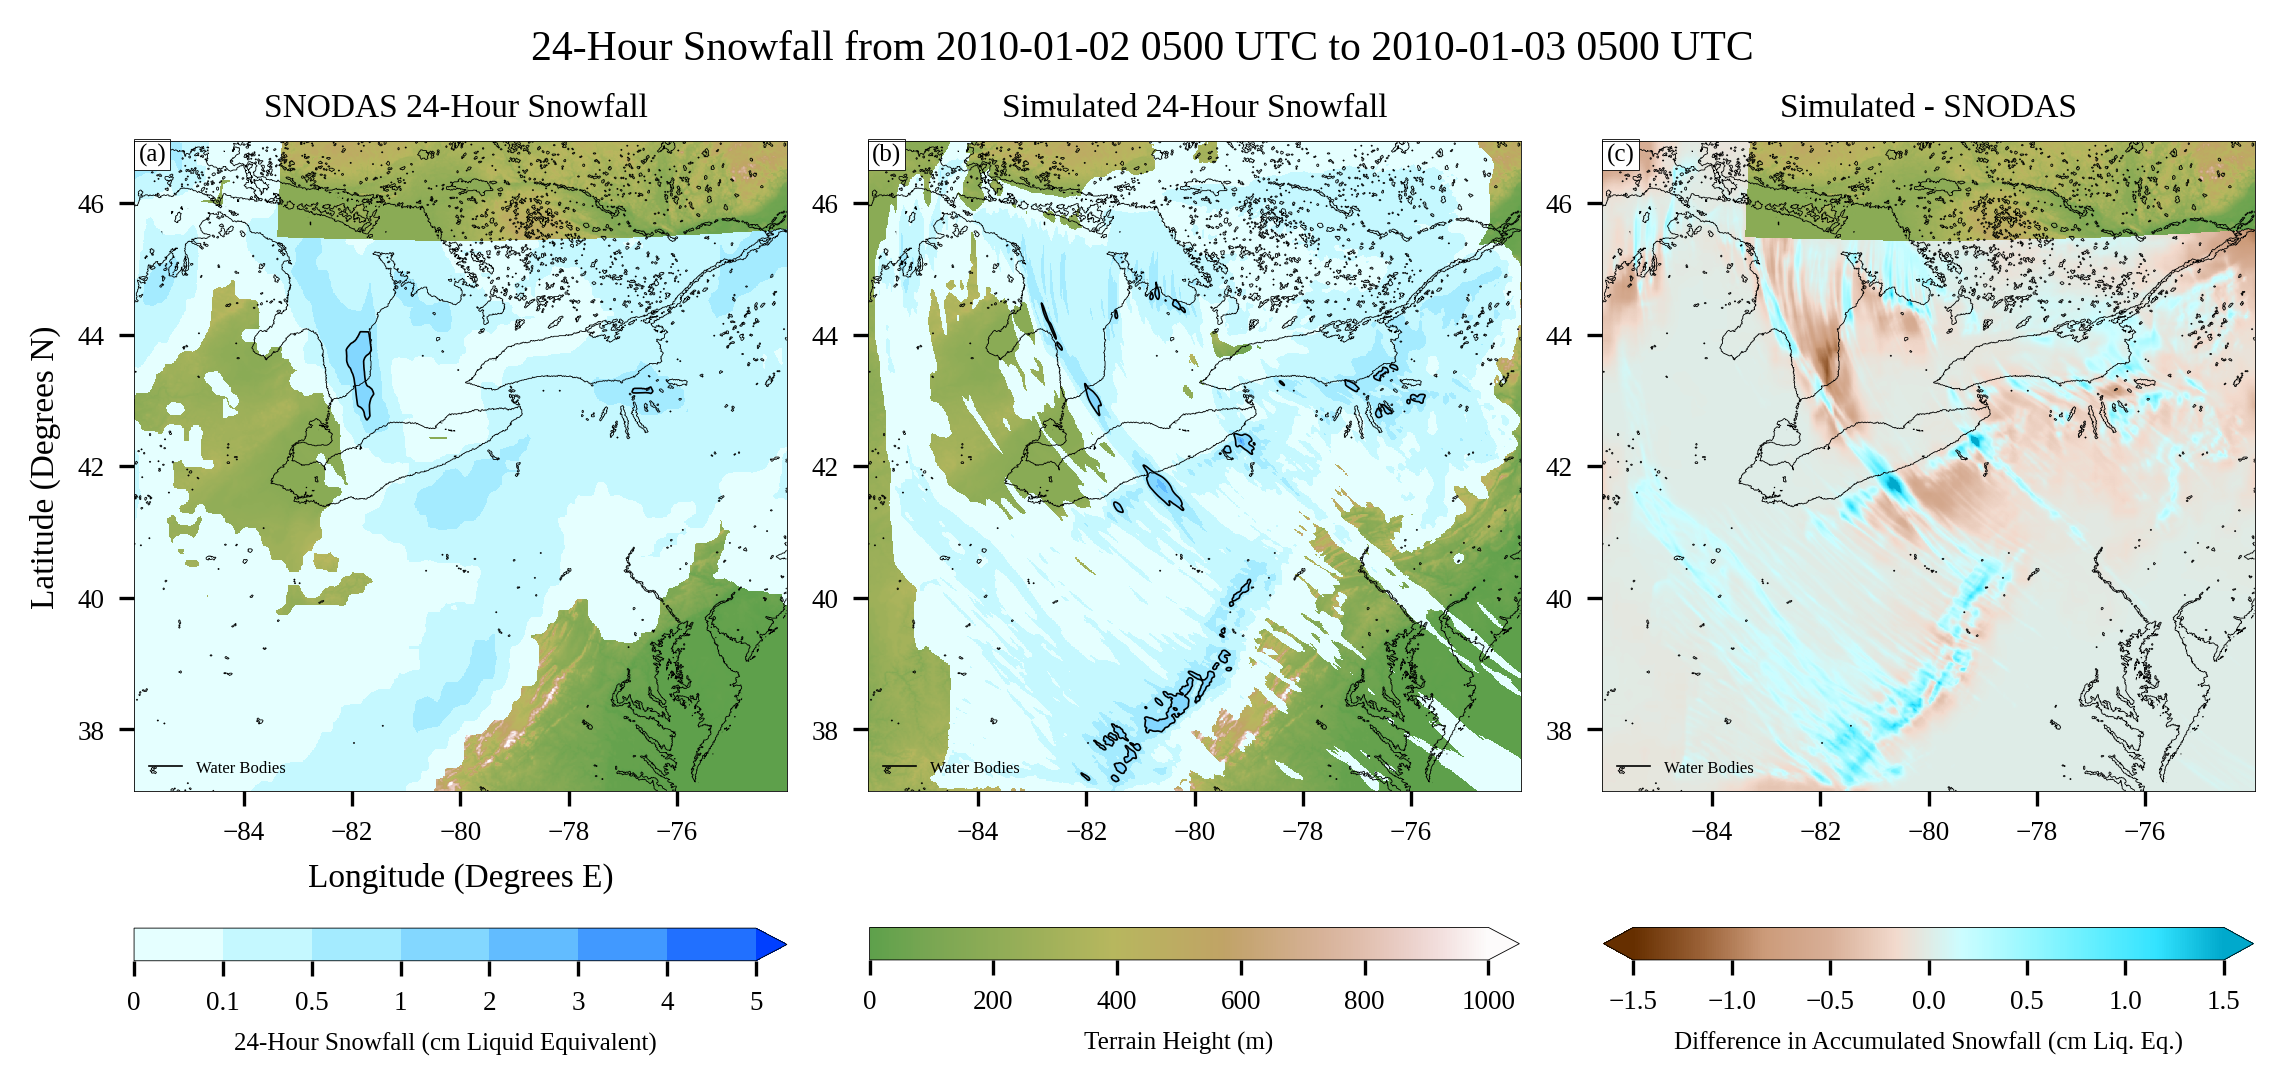

In [137]:
##### from palettable.cmocean.sequential import Ice_10
# snowcmap = Ice_10.get_mpl_colormap()
modtopocmap = truncate_colormap(mpl.colormaps.get_cmap("gist_earth"), minval = 0.5, maxval = 1, n = 128)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (7.5, 3.5), dpi = 300)
fakecontour = Line2D([], [], color = "black", linewidth = 0.4, label = "Water Bodies")
axlabels = ["(a)", "(b)", "(c)"]
for i, ax in enumerate(fig.get_axes()):
    ax.contour(afile_control["lon1d"], afile_control["lat1d"], afile_control["Patch"][1,:,:], levels = [0.999], colors = "black", linewidths = 0.2, zorder = 2)
    # ax.pcolormesh(jan2snow["lon"][5339:6785], jan2snow["lat"][1556:2740], np.ones((1183, 1445)), color = "black", zorder = 0)
    ax.annotate(axlabels[i], (0.028, 0.97), xycoords = "axes fraction", color = "black", fontsize = 6, horizontalalignment = "center", bbox = {"edgecolor": "black", "linewidth": 0.2, "facecolor": "white", "pad": 1}, zorder = 2)
    termp = ax.pcolormesh(afile_control["lon1d"], afile_control["lat1d"], afile_control["Topo"], cmap = modtopocmap, vmin = 0, vmax = 1000, zorder = 0)
    ax.set_yticks([38, 40, 42, 44, 46])
    ax.set_xticks([-84, -82, -80, -78, -76])
    ax.legend(loc = "lower left", fontsize = 4, handles = [fakecontour])
from palettable.lightbartlein.sequential import Blues10_10
nohrsccmap = Blues10_10.get_mpl_colormap()
from palettable.lightbartlein.diverging import BrownBlue10_10
snwdiffcmap = BrownBlue10_10.get_mpl_colormap()
snowbounds = [1e-3, 0.1, 0.5, 1, 2, 3, 4, 5]
snownorm = BoundaryNorm(snowbounds, ncolors = 256, extend = "max")
ax1.set_xlabel("Longitude (Degrees E)")
ax1.set_ylabel("Latitude (Degrees N)")
snowmp = ax1.pcolormesh(afile_control["lon1d"], afile_control["lat1d"], (jan3snowregrid["Snowfall"]/100).where((jan3snowregrid["Snowfall"]/100)>1e-3), cmap = nohrsccmap, norm = snownorm, zorder = 1)
ax1.contour(afile_control["lon1d"], afile_control["lat1d"], jan3snowregrid["Snowfall"]/100, levels = [1], colors = "black", linewidths = 0.4)
#factor of 100 converts to *cm* of liquid equivalent. Raw data is in kg/m^2/10, so need to multiply by 10 to get mm. I'm using cm because that's the NOHRSc scale
ax2.pcolormesh(afile_control["lon1d"], afile_control["lat1d"], (snowdiff_control/10).where(snowdiff_control/10>1e-3), cmap = nohrsccmap, norm = snownorm, zorder = 1) #Factor of 10 converts from mm liq. eq. to cm liquid equivalent
ax2.contour(afile_control["lon1d"], afile_control["lat1d"], snowdiff_control/10, levels = [1], colors = "black", linewidths = 0.4)
diffmp = ax3.pcolormesh(afile_control["lon1d"], afile_control["lat1d"], snowdiff_control/10-jan3snowregrid["Snowfall"]/100, cmap = snwdiffcmap, vmin = -1.5, vmax = 1.5)
ax1.set_title("SNODAS 24-Hour Snowfall ")
ax2.set_title("Simulated 24-Hour Snowfall")
ax3.set_title("Simulated - SNODAS")
fig.suptitle("24-Hour Snowfall from 2010-01-02 0500 UTC to 2010-01-03 0500 UTC")
snowcbar = fig.colorbar(snowmp, ax = ax1, orientation = "horizontal", fraction = 0.07); snowcbar.set_label("24-Hour Snowfall (cm Liquid Equivalent)", fontsize = 6); snowcbar.ax.set_xticklabels([0, 0.1, 0.5, 1, 2, 3, 4, 5])
tercbar = fig.colorbar(termp, ax = ax2, orientation = "horizontal", fraction = 0.05, extend = "max"); tercbar.set_label("Terrain Height (m)", fontsize = 6)
snwdiffcbar = fig.colorbar(diffmp, ax = ax3, orientation = "horizontal", fraction = 0.05, extend = "both"); snwdiffcbar.set_label("Difference in Accumulated Snowfall (cm Liq. Eq.)", fontsize = 6)
fig.savefig("PaperFigs/snowverif.png")

In [ ]:
# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 6))
# snowdiffmp = ax1.pcolormesh(downwindsnow_control, cmap = "twilight", vmin = 0, vmax = 30)
# ax2.pcolormesh(downwindsnow_nolake, cmap = "twilight", vmin = 0, vmax = 30)
# ax3.pcolormesh(downwindsnow_control-downwindsnow_nolake, cmap = "BrBG", vmin = -15, vmax = 15)
# plt.colorbar(snowdiffmp, ax = [ax1, ax2, ax3], orientation = "horizontal", fraction = 0.05)
# ax1.axhline(210)
# ax1.axhline(250)
# ax1.axvline(0)
# ax1.axvline(100)

In [ ]:
print(downwindsnow_control[250:350, 0:100].mean(), downwindsnow_nolake[250:350, 0:100].mean(), downwindsnow_control[250:350, 0:100].sum()/downwindsnow_nolake[250:350, 0:100].sum())

In [ ]:
print((downwindsnow_control.sum()-downwindsnow_nolake.sum())/downwindsnow_nolake.sum())
print(downwindsnow_control.mean())
print(downwindsnow_nolake.mean())

In [ ]:
print(snowdiff_control.isel(y = slice(laurelindices[:,0].min(), laurelindices[:,0].max()), x = slice(laurelindices[:,1].min(), laurelindices[:,1].max())).mean())
print(snowdiff_nolake.isel(y = slice(laurelindices[:,0].min(), laurelindices[:,0].max()), x = slice(laurelindices[:,1].min(), laurelindices[:,1].max())).mean())

In [ ]:
plt.pcolormesh(afile_control["lon2d"], afile_control["lat2d"], afile_control["Topo"], cmap = "gist_earth", norm = MidpointNormalize(vmin = -20, vmax = 1000, vcenter = 0))
plt.axhline(39.72, color = "orangered")
rect = mpl.patches.Rectangle(

## Make a figure showing accumulated snowfall up to this point in the simulation

In [ ]:
# afile_nolake_old = xr.open_dataset(f"/moonbow/ascheb/les/2010/hires_nolake/processed_data/mergedvars_2010-01-02-060000.nc")
# afile_control_old = xr.open_dataset(f"/moonbow/ascheb/les/2010/hires_control/processed_data/mergedvars_2010-01-02-060000.nc")
snowdiff_control = afile_control["SnowPrecipTotal"]+afile_control["AggPrecipTotal"]-afile_control_old["SnowPrecipTotal"]-afile_control_old["AggPrecipTotal"]
snowdiff_nolake = afile_nolake["SnowPrecipTotal"]+afile_nolake["AggPrecipTotal"]-afile_nolake_old["SnowPrecipTotal"]-afile_nolake_old["AggPrecipTotal"]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 9), dpi = 300)
# for ax in [ax1, ax2]:
#     tershade = terls.shade(afile_nolake["Topo"].values, dx = 1000, dy = 1000, vert_exag = 20, blend_mode = "soft", cmap = plt.get_cmap("gist_earth"), vmin = -20, vmax = 1000, norm = MidpointNormalize(vmin = -20, vmax = 1000, vcenter = 0))
#     ax.imshow(tershade, origin = "lower")
#     ax.set_xticks(np.arange(
ax1.pcolormesh(afile_control["lon1d"], afile_nolake["lat1d"], afile_nolake["Topo"], cmap = "gist_earth", norm = MidpointNormalize(vmin = -20, vmax = 1000, vcenter = 0))
ax2.pcolormesh(afile_nolake["lon1d"], afile_nolake["lat1d"], afile_nolake["Topo"], cmap = "gist_earth", norm = MidpointNormalize(vmin = -20, vmax = 1000, vcenter = 0))
ax1.pcolormesh(afile_control["lon1d"], afile_control["lat1d"], afile_control["Patch"][0,:,:].where(afile_control["Patch"][0,:,:]>0.01), vmin = 0, vmax = 0.1, cmap = "Blues", shading = "nearest")
ax2.pcolormesh(afile_control["lon1d"], afile_control["lat1d"], afile_nolake["Patch"][0,:,:].where(afile_nolake["Patch"][0,:,:]>0.01), vmin = 0, vmax = 0.1, cmap = "Blues", shading = "nearest")
snowmp = ax1.pcolormesh(afile_control["lon1d"], afile_control["lat1d"], snowdiff_control.where(snowdiff_control>0.05), cmap = "twilight", vmin = 0, vmax = 30)
ax2.pcolormesh(afile_control["lon1d"], afile_control["lat1d"], snowdiff_nolake.where(snowdiff_nolake>0.05), cmap = "twilight", vmin = 0, vmax = 30)
# ax1.annotate("Lake Huron", [-82.6, 45.1], horizontalalignment = "center", verticalalignment = "center", fontfamily = "fantasy", fontweight = "demibold", fontsize = 18, rotation = 315)
# ax1.annotate("Lake Erie", [-81.2, 42.1], horizontalalignment = "center", verticalalignment = "center", fontfamily = "fantasy", fontweight = "demibold", fontsize = 18, rotation = 30)
# ax1.annotate("Lake Ont.", [-78, 43.6], horizontalalignment = "center", verticalalignment = "center", fontfamily = "fantasy", fontweight = "demibold", fontsize = 18, rotation = 0)
ax1.set_title("CONTROL", fontfamily = "Liberation Serif")
ax2.set_title("NLH", fontfamily = "Liberation Serif")
ax1.set_ylabel("Latitude (Degrees N)", fontfamily = "Liberation Serif")
cbar = fig.colorbar(snowmp, ax = [ax1, ax2], orientation = "horizontal", ticks = [0, 5, 10, 15, 20, 30], fraction = 0.05, extend = "max"); cbar.set_label("Snowfall (mm liquid equivalent)", fontfamily = "Liberation Serif")

ax1.set_xlabel("Longitude (Degrees E)", fontsize = 20, fontfamily = "Liberation Serif")
ax2.set_xlabel("Longitude (Degrees E)", fontsize = 20, fontfamily = "Liberation Serif")
# fig.text(0.5, 0.18, "Longitude (Degrees E)", fontsize = 20, ha = "center", name = "Liberation Serif")
fig.suptitle(f"Total Snowfall as of 2010-01-{ftime}Z", fontfamily = "Liberation Serif")
fig.savefig("PaperFigs/snowcomp.png")
# plt.close()
# del fig; del ax1; del ax2

In [ ]:
# print(afile_control.data_vars)

## Figure showing the strength of secondary circulations (midlevel w)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 9), dpi = 300)
wmp = ax1.pcolormesh(afile_control["lon1d"].isel(x = slice(50, 650)), afile_control["lat1d"].isel(y = slice(450, 1050)), afile_control["w"].sel(z = 1000, method = "nearest").isel(x = slice(50, 650), y = slice(450, 1050)), cmap = "RdBu_r", vmin = -3, vmax = 3)
ax1.contour(afile_control["lon1d"].isel(x = slice(50, 650)), afile_control["lat1d"].isel(y = slice(450, 1050)), afile_control["Patch"].isel(patch = 1, x = slice(50, 650), y = slice(450, 1050)), levels = [0.99], colors = "blacK")
ax2.pcolormesh(afile_control["lon1d"].isel(x = slice(50, 650)), afile_control["lat1d"].isel(y = slice(450, 1050)), afile_nolake["w"].sel(z = 1000, method = "nearest").isel(x = slice(50, 650), y = slice(450, 1050)), cmap = "RdBu_r", vmin = -3, vmax = 3)
ax2.contour(afile_control["lon1d"].isel(x = slice(50, 650)), afile_control["lat1d"].isel(y = slice(450, 1050)), afile_nolake["Patch"].isel(patch = 1, x = slice(50, 650), y = slice(450, 1050)), levels = [0.99], colors = "blacK")
cbar = fig.colorbar(wmp, ax = [ax1, ax2], orientation = "horizontal", fraction = 0.05, extend = "both"); cbar.set_label("1km AMSL Vertical Velocity (m/s)", fontfamily = "Liberation Serif")
ax1.set_ylabel("Latitude (Degrees N)", fontfamily = "Liberation Serif")
ax1.set_xlabel("Longitude (Degrees E)", fontfamily = "Liberation Serif")
ax2.set_xlabel("Longitude (Degrees E)", fontfamily = "Liberation Serif")
ax1.set_title("CONTROL", fontfamily = "Liberation Serif")
ax2.set_title("NLH", fontfamily = "Liberation Serif")
fig.suptitle(f"Midlevel Vertical Velocity (w) at 2010-01-{ftime}Z", fontfamily = "Liberation Serif", fontsize = 32)
# fig.savefig("PaperFigs/midlevelw.png")
# plt.close(); del fig; del ax1; del ax2

In [ ]:
print(np.unique(afile_nolake["HorizDiv"].sel(z=500, method = "nearest")))

In [ ]:
plt.figure(figsize = (10, 11), dpi = 300)
plt.pcolormesh(afile_nolake["HorizDiv"].sel(z=500, method = "nearest"), cmap = "BrBG")

## Figure Showing Persistent Convergence Bands

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 9), dpi = 300)
wmp = ax1.pcolormesh(afile_control["lon1d"].isel(x = slice(50, 650)), afile_control["lat1d"].isel(y = slice(450, 1050)), afile_control["HorizDiv"].sel(z = 500, method = "nearest").isel(x = slice(50, 650), y = slice(450, 1050)), cmap = "BrBG", vmin = -0.005, vmax = 0.005)
ax1.contour(afile_control["lon1d"].isel(x = slice(50, 650)), afile_control["lat1d"].isel(y = slice(450, 1050)), afile_control["Patch"].isel(patch = 1, x = slice(50, 650), y = slice(450, 1050)), levels = [0.99], colors = "blacK")
ax2.pcolormesh(afile_control["lon1d"].isel(x = slice(50, 650)), afile_control["lat1d"].isel(y = slice(450, 1050)), afile_nolake["HorizDiv"].sel(z = 500, method = "nearest").isel(x = slice(50, 650), y = slice(450, 1050)), cmap = "BrBG", vmin = -0.005, vmax = 0.005)
ax2.contour(afile_control["lon1d"].isel(x = slice(50, 650)), afile_control["lat1d"].isel(y = slice(450, 1050)), afile_nolake["Patch"].isel(patch = 1, x = slice(50, 650), y = slice(450, 1050)), levels = [0.99], colors = "blacK")
cbar = fig.colorbar(wmp, ax = [ax1, ax2], orientation = "horizontal", fraction = 0.05, ticks = [-0.005, -0.0025, 0, 0.0025, 0.005], extend = "both"); cbar.set_label("500m AMSL Horizontal Divergence (Hz)", fontfamily = "Liberation Serif"); cbar.formatter.set_powerlimits((0,0))
ax1.set_ylabel("Latitude (Degrees N)", fontfamily = "Liberation Serif")
ax1.set_xlabel("Longitude (Degrees E)", fontfamily = "Liberation Serif")
ax2.set_xlabel("Longitude (Degrees E)", fontfamily = "Liberation Serif")
ax1.set_title("CONTROL", fontfamily = "Liberation Serif")
ax2.set_title("NLH", fontfamily = "Liberation Serif")
fig.suptitle(f"Low Level Divergence at 2010-01-{ftime}Z", fontfamily = "Liberation Serif", fontsize = 32)
# fig.savefig("PaperFigs/lowleveldiv.png")
# plt.close(); del fig; del ax1; del ax2

## Skew-T Comparing Thermodynamics in CONTROL and NLH simulations

In [78]:
controlthermo = afile_control[["Temp", "Theta", "Pressure", "Dewpoint", "VaporMix", "VaporPress"]]
nolakethermo = afile_nolake[["Temp", "Theta", "Pressure", "Dewpoint", "VaporMix", "VaporPress"]]
lakebox = xr.open_dataset("lakebox.nc")
eriethermo_control = (controlthermo.interp(x = lakebox["x"], y = lakebox["y"])*lakebox["lakemask"]).mean(dim = ("tangent", "normal")) #This averages all thermodynamic fields for the CONTROL sim horizontally over Lake Erie ONLY (lakemask filters out land)
eriethermo_nolake = (nolakethermo.interp(x = lakebox["x"], y = lakebox["y"])*lakebox["lakemask"]).mean(dim = ("tangent", "normal")) #ditto, for NLH simulation

In [16]:
print(eriethermo_control)

<xarray.Dataset>
Dimensions:   (z: 93)
Coordinates:
  * z         (z) float64 19.23 49.23 79.23 ... 5.516e+03 5.749e+03 5.994e+03
Data variables:
    Temp      (z) float64 nan nan nan nan nan ... 238.1 236.9 235.7 234.5 233.4
    Pressure  (z) float64 nan nan nan nan nan ... 509.6 494.4 478.9 463.0 446.8
    Dewpoint  (z) float64 nan nan nan nan nan ... 226.1 224.5 222.9 221.2 219.3


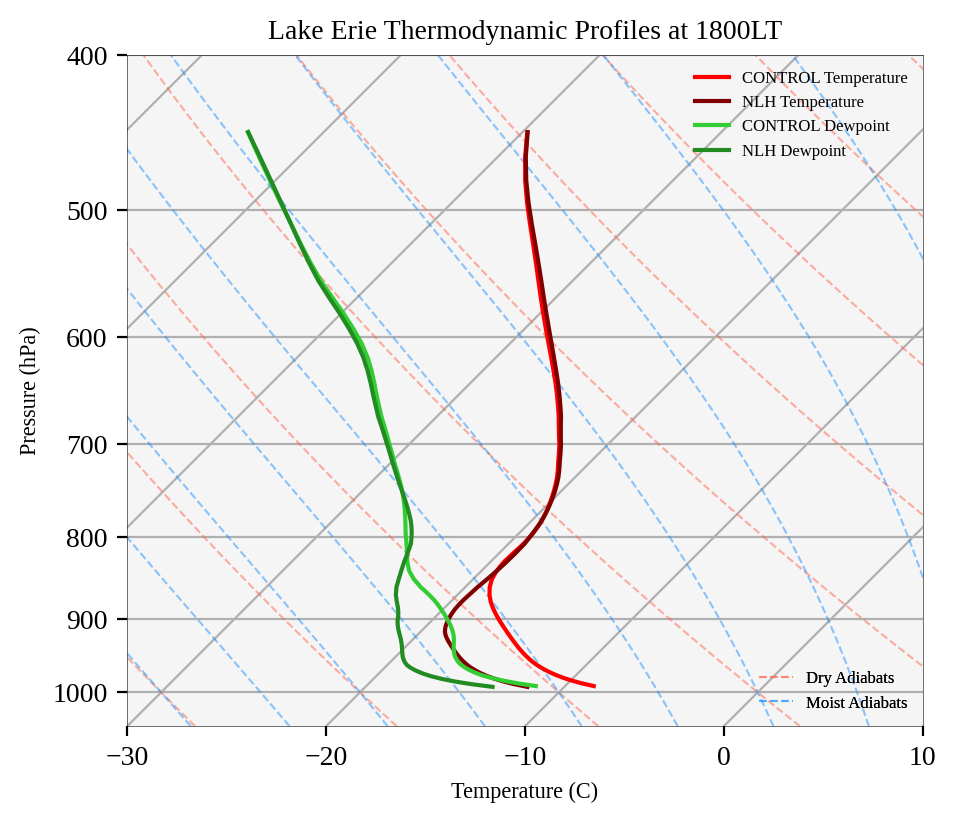

In [87]:
import metpy.calc as mcalc
from metpy.plots import SkewT
from metpy.units import units
usestyle("paperplots.mplstyle")
from matplotlib import rcParams
# rcParams["figure.titlesize"] = 10
# rcParams["axes.titlesize"] = 8
# rcParams["axes.labelsize"] = 8
# rcParams["xtick.labelsize"] = 6.5
# rcParams["ytick.labelsize"] = 6.5
# rcParams["axes.linewidth"] = 0.2
tfig = plt.figure(figsize = (5, 4), dpi = 200)
# tfig.suptitle(f"Sounding Launch at time {sound05['time'][0].values}")
testskew = SkewT(tfig, rotation = 45)
testskew.ax.set_ylim(1050, 400)
testskew.ax.set_xlim(-30, 10)
testskew.ax.set_facecolor("whitesmoke")
# testskew.ax.set_xticks(color = "black")
# testskew.ax.set_edgecolor("black")
# testskew.ax.set_labelcolor("black")
contemp, = testskew.plot(eriethermo_control["Pressure"]*units.hPa, eriethermo_control["Temp"]*units.K-273.15*units.K, color = "red", label = "CONTROL Temperature")
nlhtemp, = testskew.plot(eriethermo_nolake["Pressure"]*units.hPa, eriethermo_nolake["Temp"]*units.K-273.15*units.K, color = "maroon", label = "NLH Temperature")
condew, = testskew.plot(eriethermo_control["Pressure"]*units.hPa, eriethermo_control["Dewpoint"]*units.K-273.15*units.K, color = "limegreen", label = "CONTROL Dewpoint")
nlhdew, = testskew.plot(eriethermo_nolake["Pressure"]*units.hPa, eriethermo_nolake["Dewpoint"]*units.K-273.15*units.K, color = "forestgreen", label = "NLH Dewpoint")
# prof = mcalc.parcel_profile(nalcmsmean["Pres"][10:]*units.hPa, nalcmsmean["Temp"][:10].mean(dim = "z")*units.K, nalcmsmean["Dewpoint"][:10].mean(dim = "z")*units.K)
# testskew.plot(nalcmsmean["Pres"][10:]*units.hPa, prof-273.15*units.K, linewidth = 2, color = "gold", label = "Mixed-Layer Parcel Path")
# testskew.plot_barbs(highdptmean["Pres"][:80:5]*units.hPa, highdptmean["UC"][:80:5]*units.meter/units.second, highdptmean["VC"][:80:5]*units.meter/units.second, color = "cyan", label = "Model Wind")
# # testskew.plot_barbs(highdptmean["Pres"][:80:5]*units.hPa, sound05_interpu[:80:5]*units.meter/units.second, sound05_interpv[:80:5]*units.meter/units.second, color = "white", label = "Obs Wind")
# # testskew.plot(soundds["PRES"]*units.hPa, sounddf["TEMP"]*units.K, color = "maroon")
# # testskew.plot(soundds["PRES"]*units.hPa, sounddf["DWPT"]*units.K, color = "darkgreen")
# # testskew.plot_barbs(soundds["pres"][::100], soundds["u_wind"][::100], soundds["v_wind"][::100])
dryads = testskew.plot_dry_adiabats(t0 = np.arange(-40, 200, 10)*units.degC, colors = "tomato", linewidths = 0.75, label = "Dry Adiabats")
moistads = testskew.plot_moist_adiabats(t0 = np.arange(-40, 45, 5)*units.degC, colors = "dodgerblue", linewidths = 0.75, label = "Moist Adiabats")
# testskew.plot_mixing_lines(pressure = np.arange(1025, 450, -25)*units.hPa, colors = "limegreen", linewidths = 0.75, label = ")
proflegend = testskew.ax.legend(framealpha = 0, fontsize = 6, loc = "upper right", handles = [contemp, nlhtemp, condew, nlhdew])
testskew.ax.add_artist(proflegend)
backlegend = testskew.ax.legend(framealpha = 0, fontsize = 6, loc = "lower right", handles = [dryads, moistads])
testskew.ax.add_artist(backlegend)
testskew.ax.set_ylabel("Pressure (hPa)", fontsize = 8)
testskew.ax.set_xlabel("Temperature (C)", fontsize = 8)
testskew.ax.set_title("Lake Erie Thermodynamic Profiles at 1800LT", fontsize = 10)
plt.savefig("PaperFigs/skewtcomp.png")

In [86]:
print(eriethermo_control["VaporMix"].sel(z = slice(0, 700)).mean())
print(eriethermo_nolake["VaporMix"].sel(z = slice(0, 700)).mean())
print(eriethermo_control["Dewpoint"].sel(z = slice(300, 700)).mean())
print(eriethermo_nolake["Dewpoint"].sel(z = slice(300, 700)).mean())

<xarray.DataArray 'VaporMix' ()>
array(1.18448801)
<xarray.DataArray 'VaporMix' ()>
array(0.95515568)
<xarray.DataArray 'Dewpoint' ()>
array(256.53327826)
<xarray.DataArray 'Dewpoint' ()>
array(253.91181886)


In [79]:
print(eriethermo_control["Temp"].sel(z = 700, method = "nearest").mean())
print(eriethermo_nolake["Temp"].sel(z = 700, method = "nearest").mean())

<xarray.DataArray 'Temp' ()>
array(258.17550586)
Coordinates:
    z        float64 709.2
<xarray.DataArray 'Temp' ()>
array(254.92710784)
Coordinates:
    z        float64 709.2


In [84]:
print(eriethermo_control["Pressure"].interp(z=1000))

<xarray.DataArray 'Pressure' ()>
array(892.15954901)
Coordinates:
    z        int64 1000


## 4-Panel Figure Showing Movement of Convective Bands

In [ ]:
plttimes = date_range("2010-01-02-234000", "2010-01-03-024000", freq = "H")
patchda = xr.open_dataset("/moonbow/ascheb/les/2010/hires_control/gridconsts.nc")["Patch"]
walt = 700
print(plttimes)
print(plttimes[0].day)
print(plttimes[0].strftime("%Y-%m-%d-%H%M%S"))
try:
    afiles
except:
    afiles = xr.open_mfdataset([f"/moonbow/ascheb/les/2010/hires_control/processed_data/mergedvars_{i.strftime('%Y-%m-%d-%H%M%S')}.nc" for i in plttimes], preprocess = lambda x: x["w"], combine = "nested", concat_dim = "time")
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (20, 24))
axlabels = ["(a)", "(b)", "(c)", "(d)"]
for i, ax in enumerate(fig.get_axes()):
    ax.set_yticks([41, 42, 43, 44, 45, 46])
    ax.set_xticks([-84, -82, -80])
    ax.annotate(axlabels[i], (0.033, 0.96), xycoords = "axes fraction", color = "black", fontsize = 30, horizontalalignment = "center", bbox = {"edgecolor": "black", "linewidth": 1, "facecolor": "white"}, zorder = 3)
    fakecontour = mpl.lines.Line2D([], [], color = "navy", linewidth = 1, label = "Water Bodies")
    ax.contour(afiles.isel(time = 0)["lon1d"].isel(x = slice(50, 650)), afiles.isel(time = 0)["lat1d"].isel(y = slice(450, 1050)), patchda[1,450:1050,50:650], levels = [0.99], colors = "navy", linewidths = 1, zorder = 2)
    plttimelocal = plttimes[i]-timedelta(hours = 5)
    ax.set_title(f"{plttimelocal.strftime('%d')} Jan - {plttimelocal.strftime('%H%M')} LT")
    wmp = ax.pcolormesh(afiles.isel(time = 0)["lon1d"].isel(x = slice(50, 650)), afiles.isel(time = 0)["lat1d"].isel(y = slice(450, 1050)), afiles.isel(time = i).sel(z = walt, method = "nearest").isel(x = slice(50, 650), y = slice(450, 1050)), cmap = "RdBu_r", vmin = -3, vmax = 3)
    ax.legend(handles = [fakecontour], labelcolor = "black", loc = "lower left")
ax3.set_xlabel("Longitude (Degrees E)")
ax3.set_ylabel("Latitude (Degrees N)")
fig.suptitle(f"CONTROL Simulation {walt}m Vertical Velocity")
fig.colorbar(wmp, ax = [ax1, ax2, ax3, ax4], orientation = "horizontal", extend = "both", label = "Vertical Velocity ($\mathrm{m s^{-1}}$)", pad = 0.02)
fig.savefig("PaperFigs/wcomp_4panel.png")
plt.close()

In [ ]:
print(afiles.isel(time = 0))

## Figure Showing Snow-Free Areas with High Sensible Heat Flux

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 9), dpi = 300)
shmp = ax1.pcolormesh(afile_control["lon1d"].isel(x = slice(50, 650)), afile_control["lat1d"].isel(y = slice(450, 1050)), afile_control["SensibleHeatFlux"].isel(x = slice(50, 650), y = slice(450, 1050)), cmap = "bwr", vmin = -500, vmax = 500, zorder = 0)
ax1.contour(afile_control["lon1d"].isel(x = slice(50, 650)), afile_control["lat1d"].isel(y = slice(450, 1050)), afile_control["Patch"].isel(patch = 1, x = slice(50, 650), y = slice(450, 1050)), levels = [0.99], colors = "black", zorder = 2, linewidth = 1)
ax2.pcolormesh(afile_control["lon1d"].isel(x = slice(50, 650)), afile_control["lat1d"].isel(y = slice(450, 1050)), afile_nolake["SensibleHeatFlux"].isel(x = slice(50, 650), y = slice(450, 1050)), cmap = "bwr", vmin = -500, vmax = 500, zorder = 0)
ax2.contour(afile_control["lon1d"].isel(x = slice(50, 650)), afile_control["lat1d"].isel(y = slice(450, 1050)), afile_nolake["Patch"].isel(patch = 1, x = slice(50, 650), y = slice(450, 1050)), levels = [0.99], colors = "black", zorder = 2, linewidth = 1)
ax1.contour(afile_control["lon1d"].isel(x = slice(50, 650)), afile_control["lat1d"].isel(y = slice(450, 1050)), afile_control["SnowDepth"].isel(patch = 1, x = slice(50, 650), y = slice(450, 1050)).sum(dim = "snowlev").where(afile_control["Patch"][1,:,:] == 1), levels = [0, 0.01, 0.1], colors = ["navy", "blue", "cyan"], zorder = 1)
ax2.contour(afile_control["lon1d"].isel(x = slice(50, 650)), afile_control["lat1d"].isel(y = slice(450, 1050)), afile_nolake["SnowDepth"].isel(patch = 1, x = slice(50, 650), y = slice(450, 1050)).sum(dim = "snowlev").where(afile_nolake["Patch"][1,:,:] == 1), levels = [0, 0.01, 0.1], colors = ["navy", "blue", "cyan"], zorder = 1)
cbar = fig.colorbar(shmp, ax = [ax1, ax2], orientation = "horizontal", fraction = 0.05, ticks = [-500, -250, 0, 250, 500], extend = "both"); cbar.set_label(r"Sensible Heat Flux ($\frac{W}{m^2}$)", fontfamily = "Liberation Serif"); #cbar.formatter.set_powerlimits((0,0))
ax1.set_ylabel("Latitude (Degrees N)", fontfamily = "Liberation Serif")
ax1.set_xlabel("Longitude (Degrees E)", fontfamily = "Liberation Serif")
ax2.set_xlabel("Longitude (Degrees E)", fontfamily = "Liberation Serif")
ax1.set_title("CONTROL", fontfamily = "Liberation Serif")
ax2.set_title("NLH", fontfamily = "Liberation Serif")
fig.suptitle(f"Surface Sensible Heat Flux at 2010-01-{ftime}Z", fontfamily = "Liberation Serif", fontsize = 32)
fig.savefig("PaperFigs/senshf.png")
plt.close(); del fig; del ax1; del ax2

In [ ]:
plt.contour(afile_control["Patch"].isel(patch = 0), levels = [0.01], colors = "white")

In [ ]:
eradata = xr.open_dataset("era5_jan2010_air.grib", engine = "cfgrib")

In [ ]:
print(eradata["u"])

In [ ]:
print(eradata)

In [ ]:
print(eradata["z"].sel(isobaricInhPa = 500).mean())

In [ ]:
st = perf_counter()
tinterp, qinterp, zinterp, uinterp, vinterp = [np.zeros((20, 1098, 998)) for i in range(5)]
pvals = afile_control["Pressure"].values; print(pvals.shape)
plevs = np.array([1000, 975, 950, 925, 900, 875, 850, 825, 800, 750, 700, 750, 700, 650, 600, 550, 500, 400, 300, 200])
tvals = afile_control["Temp"].values
qvals = 1/1000*afile_control["VaporMix"].values/(1+1/1000*afile_control["VaporMix"].values)
zvals = afile_control["z"].values
uvals = afile_control["u"].values
vvals = afile_control["v"].values
for j in range(0, 1098):
    for i in range(0, 998):
        tinterp[:, j, i] = np.interp(plevs[::-1], pvals[::-1,j,i], tvals[::-1,j,i], right = np.nan)
        qinterp[:, j, i] = np.interp(plevs[::-1], pvals[::-1,j,i], qvals[::-1,j,i], right = np.nan)
        uinterp[:, j, i] = np.interp(plevs[::-1], pvals[::-1,j,i], uvals[::-1,j,i], right = np.nan)
        vinterp[:, j, i] = np.interp(plevs[::-1], pvals[::-1,j,i], vvals[::-1,j,i], right = np.nan)
        zinterp[:, j, i] = np.interp(plevs[::-1], pvals[::-1,j,i], zvals[::-1], right = np.nan)
et = perf_counter()
print(f"My Interpolation Method took {et-st:.2f} seconds")

In [ ]:
preslevds = xr.Dataset({"Temp": (("Pressure", "y", "x"), tinterp[::-1,:,:]), "SpecHum": (("Pressure", "y", "x"), qinterp[::-1,:,:]), 
                        "Geopotential": (("Pressure", "y", "x"), zinterp[::-1, :,:]), "u": (("Pressure", "y", "x"), uinterp[::-1, :,:]),
                        "v": (("Pressure", "y", "x"), vinterp[::-1, :,:])}, coords = {"Pressure": plevs, "x": afile_control["x"].values, "y": afile_control["y"].values})
preslevds = preslevds.assign_coords({"lat": (("y", "x"), afile_control["lat2d"].values), "lon": (("y", "x"), afile_control["lon2d"].values)})

In [ ]:
print(preslevds)
preslevds.to_netcdf(f"preslevdata_2010-01-{ftime}00.nc")

In [ ]:
# presmp = plt.pcolormesh(afile_control["Pressure"].isel(z=30), cmap = "bwr")
# plt.colorbar(presmp, orientation = "horizontal")
# srftempmp = plt.pcolormesh(afile_control["SrfTemp"], cmap = "bwr")
# plt.colorbar(srftempmp, orientation = "horizontal")

In [ ]:
# tempmp = plt.pcolormesh(tinterp[13,:,:], cmap = "bwr", vmin = 245, vmax = 265)
# plt.colorbar(tempmp, orientation = "horizontal")

In [ ]:
# st = perf_counter()
# tinterp_metpy = np.zeros((20, 1098, 998))
# for k,_ in enumerate(plevs):
#     tinterp_metpy[k,:,:] = interpiso(pvals[::-1], tvals[::-1], plevs[::-1][k])
# et = perf_counter()
# print(f"Metpy Interpolation took {et-st:.2f} seconds")

In [ ]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5.5))
# tmap = ax1.pcolormesh(tinterp[10,:,:], cmap = "bwr", vmin = 245, vmax = 265)
# ax2.pcolormesh(tinterp_metpy[10,:,:], cmap = "bwr", vmin = 245, vmax = 265)
# fig.colorbar(tmap, ax = [ax1, ax2], orientation = "horizontal")

## For Wednesday: Interpolate (downsample) the ERA5 data to put it on the same x-y grid as the rams data. Use xesmf for this.

In [ ]:
# presdata = xr.open_dataset("preslevdata.nc")
# presdata = presdata.assign_coords({"lat": (("y", "x"), afile_control["lat2d"].values), "lon": (("y", "x"), afile_control["lon2d"].values)})
eradata = xr.open_dataset("era5_jan2010_air.grib", engine = "cfgrib")

In [ ]:
eraground = xr.open_dataset("era5_jan2010_ground.grib", engine = "cfgrib")

In [ ]:
# rgrid = xesmf.Regridder(eradata.sel(isobaricInhPa = 500), presdata.sel(Pressure = 500), "bilinear")
# gridweights = rgrid.to_netcdf("eragridweights.nc")

# gridweights = xr.open_dataset("eragridweights.nc")
# rgrid2 = xesmf.Regridder(eradata, presdata, "bilinear", weights = gridweights)

# eragroundregrid = rgrid2(eraground)
# eraairregrid = rgrid2(eradata)

# print(eragroundrerid.data_vars)

# fulleraregrid = xr.Dataset(coords = presdata.drop_dims("Pressure").coords)
# fulleraregrid["t"] = eraairregrid["t"]
# fulleraregrid["q"] = eraairregrid["q"]
# fulleraregrid["u"] = eraairregrid["u"]
# fulleraregrid["v"] = eraairregrid["v"]
# fulleraregrid["z"] = eraairregrid["z"]
# fulleraregrid["t2m"] = eragroundrerid["t2m"]
# fulleraregrid["td2m"] = eragroundrerid["d2m"]
# fulleraregrid["u10m"] = eragroundrerid["u10"]
# fulleraregrid["v10m"] = eragroundrerid["v10"]
# fulleraregrid["mslp"] = eragroundrerid["msl"]
# fulleraregrid["srfpres"] = eragroundrerid["sp"]

# # print(fulleraregrid)
# fulleraregrid = fulleraregrid.rename({"isobaricInhPa": "Pressure"})
# fulleraregrid["Pressure"].attrs = {"units": "hPa"}
# print(fulleraregrid)
# fulleraregrid.to_netcdf("era5_ramsgrid.nc")

## Plot ERA5 Data

In [ ]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5.5))
# ax1.contour(afile_control["lon2d"], afile_control["lat2d"], 1/9.81*neweraheight.sel(time = np.datetime64("2010-01-02T23:00:00")), levels = [5150, 5200, 5250, 5300, 5350, 5400], colors = "white", linestyles = "--")
# ax1.barbs(afile_control["lon2d"][::140,::120], afile_control["lat2d"][::140,::120], newerau.sel(time = np.datetime64("2010-01-02T23:00:00"))[::140,::120], newerav.sel(time = np.datetime64("2010-01-02T23:00:00"))[::140, ::120], barbcolor = "cyan")
# ax2.contour(afile_control["lon2d"], afile_control["lat2d"], presdata["Geopotential"].sel(Pressure = 500), levels = [5150, 5200, 5250, 5300, 5350, 5400], colors = "white", linestyle = "--")
# ax2.barbs(afile_control["lon2d"][::140,::120], afile_control["lat2d"][::140,::120], presdata["u"][:,::140,::120].sel(Pressure = 500), presdata["v"][:,::140,::120].sel(Pressure = 500), barbcolor = "cyan")

In [ ]:
mstokts = 1.944 #1 m/s is 1.944 kts - use in wind barb plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (22, 22), dpi = 300, layout = "constrained", subplot_kw = {"projection": ccrs.LambertConformal(central_longitude = -100, central_latitude = 50)})
eratime = np.datetime64("2010-01-03T00:00:00")
ax1.set_extent((-130, -70, 25, 70), crs = ccrs.PlateCarree())
ax1.set_aspect(1.3)
from matplotlib import ticker as mticker
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
for axsub in (ax2, ax3, ax4):
    axsub.set_extent((-95, -75, 38, 55), crs = ccrs.PlateCarree())
    # ax.add_feature(cfeature.STATES_PROVINCES, color = "white", zorder = 2)
axlabels = ["a)", "b)", "c)", "d)"]
for i, ax in enumerate(fig.get_axes()):
    ax.annotate(axlabels[i], (0.03, 0.96), xycoords = "axes fraction", color = "black", fontsize = 30, horizontalalignment = "center", bbox = {"edgecolor": "black", "linewidth": 1, "facecolor": "white"}, zorder = 4)
    
for ax in (ax1, ax2):
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'coastline', '50m', edgecolor = 'darkgrey', facecolor = "none", linewidth = 1, zorder = 2))
    ax.add_feature(cfeature.NaturalEarthFeature('cultural', 'admin_0_boundary_lines_land', '50m', edgecolor = "black", facecolor = "none", linewidth = 1, zorder = 2))
    # ax.add_feature(cfeature.NaturalEarthFeature('physical', 'lakes', '50m',
    #                                             edgecolor='navy',
    #                                             facecolor="none", linewidth = 0.2), zorder = 1)
    # ax.add_feature(cfeature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lines', facecolor='none', scale = "50m", edgecolor='darkgrey', zorder = 2))
    ax.add_feature(cfeature.NaturalEarthFeature(category="cultural", name = "admin_1_states_provinces_lakes", facecolor = "none", scale = "50m", edgecolor = "black", zorder = 2))
    
for ax in (ax3, ax4):
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'coastline', '50m', edgecolor = 'black', facecolor = "none", linewidth = 1, zorder = 2))
    ax.add_feature(cfeature.NaturalEarthFeature('cultural', 'admin_0_boundary_lines_land', '50m', edgecolor = "black", facecolor = "none", linewidth = 1, zorder = 2))
    # ax.add_feature(cfeature.NaturalEarthFeature('physical', 'lakes', '50m',
    #                                             edgecolor='navy',
    #                                             facecolor="none", linewidth = 0.2), zorder = 1)
    # ax.add_feature(cfeature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lines', facecolor='none', scale = "50m", edgecolor='darkgrey', zorder = 2))
    ax.add_feature(cfeature.NaturalEarthFeature(category="cultural", name = "admin_1_states_provinces_lakes", facecolor = "none", scale = "50m", edgecolor = "black", zorder = 2))
    # ax.yaxis.tick_right()
    # ax.set_xticks([-95, -85, -75], crs=ccrs.PlateCarree())
    # ax.set_yticks([40, 45, 50, 55], crs=ccrs.PlateCarree())
    # lon_formatter = LongitudeFormatter(zero_direction_label=True)
    # lat_formatter = LatitudeFormatter()
    # ax.xaxis.set_major_formatter(lon_formatter)
    # ax.yaxis.set_major_formatter(lat_formatter)
    gl34 = ax.gridlines(crs = ccrs.PlateCarree(), draw_labels = {"bottom": "x", "left": "y"}, x_inline = False, y_inline = False, dms = True)
    gl34.xlocator = mticker.FixedLocator([-90, -85, -80])
    gl34.ylocator = mticker.FixedLocator([40, 45, 50, 55])
    gl34.bottom_labels = True
    gl34.left_labels   = True
    gl34.xlines = False
    gl34.ylines = False
    gl34.top_labels    = False
    gl34.right_labels  = False
    gl34.xlabel_style = {'size': 20, 'color': 'black', 'rotation': 0, "horizontalalignment": "right"}
    gl34.ylabel_style = {'size': 20, 'color': 'black', 'rotation': 0, "horizontalalignment": "right"}
    
gl1 = ax1.gridlines(crs = ccrs.PlateCarree(), draw_labels = {"bottom": "x", "left": "y"}, x_inline = False, y_inline = False)
gl1.xlocator = mticker.FixedLocator([-120, -100, -80])
gl1.ylocator = mticker.FixedLocator([25, 35, 45, 55])
gl1.bottom_labels = True
gl1.left_labels   = True
gl1.xlines = False
gl1.ylines = False
gl1.top_labels    = False
gl1.right_labels  = False
gl1.xlabel_style = {'size': 20, 'color': 'black', 'rotation': 0, "horizontalalignment": "center", 'rotation_mode': 'default'}
gl1.ylabel_style = {'size': 20, 'color': 'black', 'rotation': 0, "horizontalalignment": "center", 'rotation_mode': 'default'}

gl2 = ax2.gridlines(crs = ccrs.PlateCarree(), draw_labels = {"bottom": "x", "left": "y"}, x_inline = False, y_inline = False)
gl2.xlocator = mticker.FixedLocator([-90, -85, -80])
gl2.ylocator = mticker.FixedLocator([40, 45, 50, 55])
gl2.bottom_labels = True
gl2.left_labels   = True
gl2.xlines = False
gl2.ylines = False
gl2.top_labels = False
gl2.right_labels = False
gl2.xlabel_style = {'size': 20, 'color': 'black', 'rotation': 0, "horizontalalignment": "right", 'rotation_mode': 'default'}
gl2.ylabel_style = {'size': 20, 'color': 'black', 'rotation': 0, "horizontalalignment": "right", 'rotation_mode': 'default'}

fig.suptitle(f"Synoptic Conditions on {eratime.astype(datetime).strftime('%d')} Jan at {eratime.astype(datetime).strftime('%H%M')} UTC")
ax1.set_title(f"500mb Heights and Winds")
heightmp = ax1.contour(eradata["longitude"], eradata["latitude"], 1/9.81*eradata["z"].sel(time = eratime, isobaricInhPa = 500), levels = np.arange(5220, 5880, 60), colors = "black", linestyles = "--", transform = ccrs.PlateCarree(), zorder = 3)
ax1.clabel(heightmp, inline = True, fontsize = 15)
ax1.barbs(eradata["longitude"][::25], eradata["latitude"][::25], mstokts*eradata["u"].sel(time = eratime, isobaricInhPa = 500)[::25, ::25].values, mstokts*eradata["v"].sel(time = eratime, isobaricInhPa = 500)[::25,::25].values, color = "dodgerblue", transform = ccrs.PlateCarree(), length = 8, zorder = 3)
ax2.set_title(f"925mb Specific Humidity and Winds")
vapmp = ax2.contour(eradata["longitude"].sel(longitude = slice(-98, -70)), eradata["latitude"].sel(latitude = slice(57, 35)), 1000*eradata["q"].sel(time = eratime, isobaricInhPa = 925, longitude = slice(-98, -70), latitude = slice(57, 35)), levels = [0.5, 1, 2], colors = "forestgreen", linestyles = "--", transform = ccrs.PlateCarree(), zorder = 0)
ax2.clabel(vapmp, inline = True, fontsize = 15)
ax2.barbs(eradata["longitude"][::8], eradata["latitude"][::8], mstokts*eradata["u"].sel(time = eratime, isobaricInhPa = 925).where(1/100*eraground["sp"].sel(time = eratime)>925)[::8, ::8].values, mstokts*eradata["v"].sel(time = eratime, isobaricInhPa = 925).where(1/100*eraground["sp"].sel(time = eratime)>925)[::8, ::8].values, color = "black", transform = ccrs.PlateCarree(), length = 8, zorder = 3)
ax3.set_title(f"850mb Temperature and Winds")
ax3.barbs(eradata["longitude"][::8], eradata["latitude"][::8], mstokts*eradata["u"].sel(time = eratime, isobaricInhPa = 850).where(1/100*eraground["sp"].sel(time = eratime)>850)[::8, ::8].values, mstokts*eradata["v"].sel(time = eratime, isobaricInhPa = 850).where(1/100*eraground["sp"].sel(time = eratime)>850)[::8, ::8].values, color = "black", transform = ccrs.PlateCarree(), length = 8, zorder = 3)
ax3.pcolormesh(eradata["longitude"], eradata["latitude"], eradata["t"].sel(time = eratime, isobaricInhPa = 850).where(1/100*eraground["sp"].sel(time = eratime)>850), cmap = "Spectral_r", transform = ccrs.PlateCarree(), zorder = 0, vmin = 245, vmax = 275)
ax4.set_title(f"Surface Temperature, Pressure, and Winds")
stempmp = ax4.pcolormesh(eraground["longitude"], eraground["latitude"], eraground["t2m"].sel(time = eratime), cmap = "Spectral_r", transform = ccrs.PlateCarree(), zorder = 0, vmin = 245, vmax = 275)
mslpmp = ax4.contour(eraground["longitude"], eraground["latitude"], 1/100*eraground["msl"].sel(time = eratime), levels = [980, 984, 988, 992, 996, 1000, 1004, 1008, 1012, 1016, 1020, 1024, 1028, 1032, 1036, 1040], colors = "black", linestyles = "--", transform = ccrs.PlateCarree(), zorder = 3)
ax4.clabel(mslpmp, inline = True, fontsize = 15, levels = [1008, 1016, 1024, 1032])
ax4.barbs(eradata["longitude"][::8], eradata["latitude"][::8], mstokts*eraground["u10"].sel(time = eratime)[::8,::8].values, mstokts*eraground["v10"].sel(time = eratime)[::8,::8].values, color = "black", transform = ccrs.PlateCarree(), length = 8, zorder = 3)
fig.colorbar(stempmp, ax = [ax1, ax2, ax3, ax4], orientation = "horizontal", extend = "both", fraction = 0.02, label = "Temperature (K)")
fig.savefig("PaperFigs/synoptic.png")
plt.close(); del fig; del ax1; del ax2; del ax3; del ax4

## Plot Comparison of ERA5 and RAMS State Variables

In [ ]:
eraramsgrid = xr.open_dataset("era5_ramsgrid.nc"); print(eraramsgrid)
presdata = xr.open_dataset(f"preslevdata_2010-01-{ftime}00.nc"); print(presdata)

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (30, 36))
pltftime = "2010-01-03-000000"
plttimelocal = datetime.strptime(pltftime, "%Y-%m-%d-%H%M%S")-timedelta(hours = 5)
for i, ax in enumerate(fig.get_axes()):
    fakecontour = mpl.lines.Line2D([], [], color = "navy", linewidth = 1, label = "Water Bodies")
    ax.contour(afile_control["lon1d"], afile_control["lat1d"], afile_control["Patch"][1,:,:], levels = [0.99], colors = "navy", linewidths = 1)
    ax.set_title(f"{plttimelocal.strftime('%d')} Jan - {plttimelocal.strftime('%H%M')} LT")
    ax.set_xlabel("Longitude (Degrees E)")
    ax.set_ylabel("Latitude (Degrees N)")
    ax.set_yticks([41, 42, 43, 44, 45, 46])
    ax.set_xticks([-84, -82, -80])
    ax1.pcolormesh(afile_control["lon1d"], afile_control["lat1d"], eraramsgrid["t"].sel(time = plttimelocal, Pressure = 850), cmap = "Spectral_r", norm = MidpointNormalize(vmin = 245, vmax = 275, vcenter = 260))
    ax2.pcolormesh(afile_control["lon1d"], afile_control["lat1d"], presdata["Temp"].sel(Pressure = 850), cmap = "Spectral_r", norm = MidpointNormalize(vmin = 245, vmax = 275, vcenter = 260))

In [ ]:
# print(preslevds["u"][:,::20,::20].sel(Pressure = 500))

In [ ]:
goesdata = xr.open_dataset("goes12data.nc", decode_coords = "all")

In [ ]:
plt.figure(figsize = (20, 7), dpi = 200)
plt.imshow(goesdata["data"][0,0:1500,4000:7000], cmap = "Greys_r", vmin = 0, vmax = 7000)

In [ ]:
afile_control_20z = xr.open_dataset("/moonbow/ascheb/les/2010/hires_control/processed_data/mergedvars_2010-01-02-214000.nc")

In [ ]:
afile_control_20z["ShortwaveUp"][-1,:,:].plot(cmap = "Greys_r", vmin = 0, vmax = 200)

In [ ]:
lhymin = 640; lhymax = 1040; lhxmin = 140; lhxmax = 420 #lh - main body of Lake Huron
gbymin = 800; gbymax = 1000; gbxmin = 420; gbxmax = 700 #gb - Georgian Bay and downwind land
print(afile_control["lat1d"][lhymin:lhymax])
print(afile_control["lon1d"][lhxmin:lhxmax])
print(afile_control["lat1d"][gbymin:gbymax])
print(afile_control["lon1d"][gbxmin:gbxmax])